Process Time 0.1793506145477295


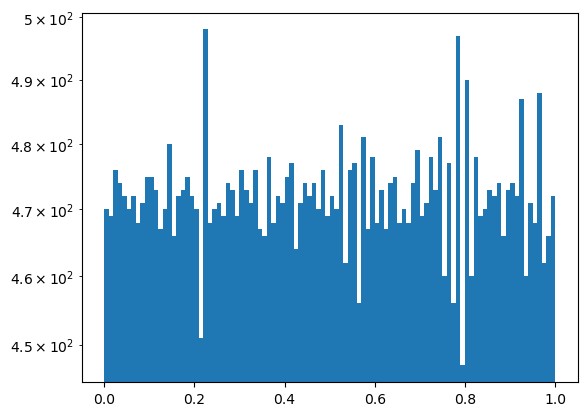

In [11]:
## Lets do it okay
from rbm_torch.utils.utils import fasta_read
import rbm_torch.utils.data_prep as dp


file_in = "late_5gcmax_raw.fasta"
seqs, copy_num, chars, q = fasta_read(file_in, "dna")

from sklearn.preprocessing import QuantileTransformer
import numpy as np

qt = QuantileTransformer(output_distribution="uniform")

np.random.default_rng(69)
noisy_copy_num = np.random.normal(np.asarray(copy_num), 0.001)

new_vals = qt.fit_transform(noisy_copy_num.reshape(-1, 1))

dp.quick_hist(new_vals, bins=100)

In [12]:
dp.make_weight_file("5gc_regression", new_vals.squeeze(1).tolist(), dir="./")